In [ ]:
#hide
%load_ext autoreload
%autoreload 2

In [ ]:
%load_ext line_profiler
%load_ext memory_profiler

### code profiling help

https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html

`%time`: Time the execution of a single statement  
`%timeit`: Time repeated execution of a single statement for more accuracy  
`%prun`: Run code with the profiler  
`%lprun`: Run code with the line-by-line profiler  
`%memit`: Measure the memory use of a single statement  
`%mprun`: Run code with the line-by-line memory profiler  


# pantograph_constructor

> This package provides all functionality from graph construction (currently, from annotation, in the future, from raw assembled sequences) to graph processing (sorting, grouping, adjusting). 

>It also provides universal graph data model class `GenomeGraph`, which implements graph IO through GFA v1 (in the future also v2 format) as well as all operations on the graph.

## Install

Enter the directory of the library and enter:

`pip install .`

## How to use

In [ ]:
from nbdev.export import notebook2script
notebook2script()

Converted 00_init.ipynb.
Converted 01_graph.ipynb.
Converted 02_tree.ipynb.
Converted 03_synteny.ipynb.
Converted 04_utils.ipynb.
Converted 05_export.ipynb.
Converted deBruijnGraphProcessing.ipynb.
Converted index.ipynb.


In [ ]:
from redis import Redis

In [ ]:
import cProfile
import pstats
from pstats import SortKey

In [ ]:
import os
import glob
import re
from random import shuffle

import networkx as nx

from pangraph_constructor.graph import GenomeGraph
from pangraph_constructor.synteny import generateOrder,readTransMap
from pangraph_constructor.tree import TremauxTree
from pangraph_constructor.utils import pathFileToPathDict,getDBID
from pangraph_constructor.utils import iset_add,iset_score

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
datadir = '../../1001G/annotation'
gfadir = '../../1001G/pantograph/data'

In [ ]:
datadir = '.'
gfadir = '.'

In [ ]:
annotationFiles = sorted(glob.glob(f'{datadir}{os.path.sep}*.gff'))
sequenceFiles = sorted(glob.glob(f'{datadir}{os.path.sep}sequences{os.path.sep}*.fasta'))
transMapFile = f'{datadir}{os.path.sep}stats{os.path.sep}TransMap.map'

In [ ]:
annotationFiles,sequenceFiles,transMapFile

(['../../1001G/annotation/10002.gff',
  '../../1001G/annotation/10015.gff',
  '../../1001G/annotation/10024.gff',
  '../../1001G/annotation/1741.gff',
  '../../1001G/annotation/35-1.gff',
  '../../1001G/annotation/6024.gff',
  '../../1001G/annotation/6069.gff',
  '../../1001G/annotation/6124.gff',
  '../../1001G/annotation/6244.gff',
  '../../1001G/annotation/6909.gff',
  '../../1001G/annotation/6966.gff',
  '../../1001G/annotation/8236.gff',
  '../../1001G/annotation/85-3.gff',
  '../../1001G/annotation/9075.gff',
  '../../1001G/annotation/9537.gff',
  '../../1001G/annotation/9543.gff',
  '../../1001G/annotation/9638.gff',
  '../../1001G/annotation/9728.gff',
  '../../1001G/annotation/9764.gff',
  '../../1001G/annotation/9888.gff',
  '../../1001G/annotation/9905.gff',
  '../../1001G/annotation/A1.gff',
  '../../1001G/annotation/ET-86.gff',
  '../../1001G/annotation/Elh-2.gff',
  '../../1001G/annotation/R1.gff',
  '../../1001G/annotation/TIAR10.gff',
  '../../1001G/annotation/Taz-0.gff

In [ ]:
fileOrder = generateOrder(annotationFiles)
fileOrder

[25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 26]

In [ ]:
# doCigars = False
doUS = False
gfaFilename = 'AT_Chr1_OGOnly_new.gfa'
seqSuffix = '_Chr1'

In [ ]:
graph = GenomeGraph(annotationFiles=annotationFiles,sequenceFiles=sequenceFiles,fileOrder=fileOrder,doUS=doUS,seqSuffix=seqSuffix)

In [ ]:
graph.toGFA(f'{gfadir}{os.path.sep}{gfaFilename}',doSeq=False)

# Loading graph from GFA

## Large graph

In [ ]:
graph_new = GenomeGraph(gfaPath='./test_long_graph.gfa',isGFASeq=False)

Loading graph from ./test_long_graph.gfa
Loading segment 8087/8087
Loading segments finished.
Loading link 15983/15983
Loading links finished
Loading link 27/27
Loading paths finished. 27 paths added, 0 paths ignored.


In [ ]:
notebook2script()

Converted 00_init.ipynb.
Converted 01_graph.ipynb.
Converted 02_tree.ipynb.
Converted 03_synteny.ipynb.
Converted 04_utils.ipynb.
Converted 05_export.ipynb.
Converted index.ipynb.


In [ ]:
graph_new.treeSort()

Constructing Tremaux tree
Node: 1
Graph edges: [(14, 1), (69, 1), (148, 1), (235, 1), (6861, 1)]
Tree edges: []
Edge to keep: (14, 1)
Cycle found!
Path to break: [1, 2, 3, 7824, 4, 5, 6, 8, 9, 10, 11, 12, 13, 6734, 14]
Unbreakable path!
Node: 6734
Graph edges: [(13, 6734), (2607, 6734), (3012, 6734), (3125, 6734), (3285, 6734), (3304, 6734), (3521, 6734), (3706, 6734), (3841, 6734), (4360, 6734), (4848, 6734), (4924, 6734), (5335, 6734), (5689, 6734), (6539, 6734), (6733, 6734), (6751, 6734), (6789, 6734), (7215, 6734), (7556, 6734), (7721, 6734)]
Tree edges: [(13, 6734)]
Edge to keep: (3521, 6734)
Cycle found!
Path to break: [6734, 3842, 3841, 3840, 3839, 3838, 7609, 3058, 3059, 6408, 1129, 1130, 3304, 6528, 6762, 7136, 7137, 3232, 3233, 3234, 3235, 3236, 6757, 3237, 3238, 6513, 914, 3340, 1920, 1921, 1922, 1916, 1925, 6704, 1926, 1929, 1930, 1931, 6416, 6539, 6560, 3371, 3268, 6769, 3269, 6523, 6933, 3204, 6529, 3288, 7141, 3154, 3152, 3153, 6913, 3777, 3776, 3775, 6950, 3774, 3773, 

In [ ]:
len(graph_new.nodes),len(graph_new.order)

(8087, 8087)

In [ ]:
count = 0
for node,indeg in graph_new.tremauxTree.in_degree:
    if indeg!=1:
        count+=1
        print(f'{node}: {indeg}')
        
print(count)

0


In [ ]:
cProfile.run('graph_new.treeSort()','treesort_profile_long')

Constructing Tremaux tree
Done!
Getting root nodes
Start Loop...
0 - 0 - 1 - 1 - 2
0 - 1 - 2 - 2 - 3
1 - 2 - 3 - 3 - 4
1 - 2 - 3 - 3 - 7824
0 - 3 - 4 - 3 - 4
0 - 4 - 5 - 4 - 5
0 - 5 - 6 - 5 - 6
1 - 6 - 7 - 6 - 7
1 - 7 - 8 - 7 - 8
1 - 8 - 9 - 8 - 9
1 - 9 - 10 - 9 - 10
1 - 10 - 11 - 10 - 11
1 - 11 - 12 - 11 - 12
1 - 12 - 13 - 12 - 13
2 - 13 - 14 - 13 - 14
3 - 14 - 15 - 14 - 16
3 - 14 - 15 - 14 - 15
2 - 15 - 16 - 14 - 16
2 - 16 - 17 - 16 - 17
2 - 17 - 18 - 17 - 18
2 - 18 - 19 - 18 - 19
2 - 19 - 20 - 19 - 20
2 - 20 - 21 - 20 - 21
2 - 21 - 22 - 21 - 22
2 - 22 - 23 - 22 - 23
2 - 23 - 24 - 23 - 24
2 - 24 - 25 - 24 - 25
2 - 25 - 26 - 25 - 26
2 - 26 - 27 - 26 - 27
2 - 27 - 28 - 27 - 28
2 - 28 - 29 - 28 - 29
2 - 29 - 30 - 29 - 30
2 - 30 - 31 - 30 - 31
3 - 31 - 32 - 31 - 32
3 - 32 - 33 - 32 - 33
3 - 32 - 33 - 31 - 7868
2 - 33 - 34 - 32 - 33
2 - 34 - 35 - 33 - 34
2 - 35 - 36 - 34 - 35
3 - 36 - 37 - 35 - 36
3 - 37 - 38 - 36 - 37
3 - 37 - 38 - 35 - 6862
3 - 38 - 39 - 6862 - 6863
2 - 39 - 40 - 36 - 3

In [ ]:
%lprun?

Docstring:
Execute a statement under the line-by-line profiler from the
line_profiler module.

Usage:
  %lprun -f func1 -f func2 <statement>

The given statement (which doesn't require quote marks) is run via the
LineProfiler. Profiling is enabled for the functions specified by the -f
options. The statistics will be shown side-by-side with the code through the
pager once the statement has completed.

Options:

-f <function>: LineProfiler only profiles functions and methods it is told
to profile.  This option tells the profiler about these functions. Multiple
-f options may be used. The argument may be any expression that gives
a Python function or method object. However, one must be careful to avoid
spaces that may confuse the option parser.

-m <module>: Get all the functions/methods in a module

One or more -f or -m options are required to get any useful results.

-D <filename>: dump the raw statistics out to a pickle file on disk. The
usual extension for this is ".lprof". These stat

In [ ]:
%lprun -f GenomeGraph.treesort 'graph_new.treeSort()'

UsageError: Could not find function 'GenomeGraph.treesort'.
AttributeError: type object 'GenomeGraph' has no attribute 'treesort'


In [ ]:
p = pstats.Stats('treesort_profile_long')
p.strip_dirs().sort_stats(SortKey.CUMULATIVE).print_stats()

In [ ]:
len(graph_new.order),len(graph_new.nodes),len(graph_new.tremauxTree),len(graph_new.tremauxTree.originalGraph)

(7982, 8087, 8087, 8087)

In [ ]:
gfaFilename

'AT_Chr1_OGOnly.gfa'

In [ ]:
gfadir

'../../1001G/pantograph/data'

In [ ]:
graph_new.toGFA(f'{gfadir}{os.path.sep}{gfaFilename}',doSeq=False)

## Large graph with unrelated sequences and real sequences

In [ ]:
graph_new2 = GenomeGraph(gfaPath='./test_long_graph_full_seq.gfa',isGFASeq=True)

In [ ]:
len(graph_new2.accessions)

27

In [ ]:
graph_new2.treeSort()

Constructing Tremaux tree
Done!
Getting root nodes
Start Loop...
0 - 0 - 1 - 1 - 2
0 - 1 - 2 - 2 - 3
1 - 2 - 3 - 3 - 4
1 - 2 - 3 - 3 - 7824
0 - 3 - 4 - 3 - 4
0 - 4 - 5 - 4 - 5
0 - 5 - 6 - 5 - 6
1 - 6 - 7 - 6 - 7
1 - 7 - 8 - 7 - 8
1 - 8 - 9 - 8 - 9
1 - 9 - 10 - 9 - 10
1 - 10 - 11 - 10 - 11
1 - 11 - 12 - 11 - 12
1 - 12 - 13 - 12 - 13
2 - 13 - 14 - 13 - 14
3 - 14 - 15 - 14 - 16
3 - 14 - 15 - 14 - 15
2 - 15 - 16 - 14 - 16
2 - 16 - 17 - 16 - 17
2 - 17 - 18 - 17 - 18
2 - 18 - 19 - 18 - 19
2 - 19 - 20 - 19 - 20
2 - 20 - 21 - 20 - 21
2 - 21 - 22 - 21 - 22
2 - 22 - 23 - 22 - 23
2 - 23 - 24 - 23 - 24
2 - 24 - 25 - 24 - 25
2 - 25 - 26 - 25 - 26
2 - 26 - 27 - 26 - 27
2 - 27 - 28 - 27 - 28
2 - 28 - 29 - 28 - 29
2 - 29 - 30 - 29 - 30
2 - 30 - 31 - 30 - 31
3 - 31 - 32 - 31 - 32
3 - 32 - 33 - 32 - 33
3 - 32 - 33 - 31 - 7868
2 - 33 - 34 - 32 - 33
2 - 34 - 35 - 33 - 34
2 - 35 - 36 - 34 - 35
3 - 36 - 37 - 35 - 36
3 - 37 - 38 - 36 - 37
3 - 37 - 38 - 35 - 6862
3 - 38 - 39 - 6862 - 6863
2 - 39 - 40 - 36 - 3

In [ ]:
len(graph_new2.order),len(graph_new2.nodes),len(graph_new2.tremauxTree),len(graph_new2.tremauxTree.originalGraph)

(8087, 8087, 8087, 8087)

In [ ]:
gfaFilename

'AT_Chr1_Full_Seq.gfa'

In [ ]:
gfadir

'../../1001G/pantograph/data'

In [ ]:
gfaFilename = 'AT_Chr1_OGOnly_Seq.gfa'

In [ ]:
graph_new2.toGFA(f'{gfadir}{os.path.sep}{gfaFilename}',doSeq=True)

## Christian's test graph

In [ ]:
graph_new = GenomeGraph(gfaPath='../../1001G/graphSorting/graphs/sixRef.panGenome.Chroms.pggb.Chr2.5mb.gfa',isGFASeq=True)

In [ ]:
len(graph_new.accessions)

7

In [ ]:
cProfile.run('graph_new.treeSort()','treesort_profile')

Constructing Tremaux tree
Done!
Getting root nodes
Start Loop...
0 - 0 - 1 - 1 - 2
0 - 1 - 2 - 2 - 3
0 - 2 - 3 - 3 - 4
0 - 3 - 4 - 4 - 5
0 - 4 - 5 - 5 - 6
0 - 5 - 6 - 6 - 7
0 - 6 - 7 - 7 - 8
0 - 7 - 8 - 8 - 9
0 - 8 - 9 - 9 - 10
0 - 9 - 10 - 10 - 11
0 - 10 - 11 - 11 - 12
0 - 11 - 12 - 12 - 13
0 - 12 - 13 - 13 - 14
0 - 13 - 14 - 14 - 15
0 - 14 - 15 - 15 - 16
0 - 15 - 16 - 16 - 17
0 - 16 - 17 - 17 - 18
0 - 17 - 18 - 18 - 19
0 - 18 - 19 - 19 - 20
0 - 19 - 20 - 20 - 21
0 - 20 - 21 - 21 - 22
0 - 21 - 22 - 22 - 23
0 - 22 - 23 - 23 - 24
0 - 23 - 24 - 24 - 25
0 - 24 - 25 - 25 - 26
0 - 25 - 26 - 26 - 27
0 - 26 - 27 - 27 - 28
0 - 27 - 28 - 28 - 29
0 - 28 - 29 - 29 - 30
0 - 29 - 30 - 30 - 31
0 - 30 - 31 - 31 - 32
0 - 31 - 32 - 32 - 33
0 - 32 - 33 - 33 - 34
0 - 33 - 34 - 34 - 35
0 - 34 - 35 - 35 - 36
0 - 35 - 36 - 36 - 37
0 - 36 - 37 - 37 - 38
0 - 37 - 38 - 38 - 39
0 - 38 - 39 - 39 - 40
0 - 39 - 40 - 40 - 41
0 - 40 - 41 - 41 - 42
0 - 41 - 42 - 42 - 43
0 - 42 - 43 - 43 - 44
0 - 43 - 44 - 44 - 45
0 -

In [ ]:
p = pstats.Stats('treesort_profile')
p.strip_dirs().sort_stats(SortKey.CUMULATIVE).print_stats()

In [ ]:
len(graph_new.order),len(graph_new.nodes),len(graph_new.tremauxTree),len(graph_new.tremauxTree.originalGraph)

(447, 447, 447, 447)

In [ ]:
gfaFilename='testChristian_new.gfa'

In [ ]:
gfadir

'../../1001G/pantograph/data'

In [ ]:
graph_new.toGFA(f'{gfadir}{os.path.sep}{gfaFilename}',doSeq=True)

In [ ]:
shuffle(graph_new.order)

In [ ]:
gfaFilename='testChristian_shuffled.gfa'

In [ ]:
graph_new = GenomeGraph(gfaPath='../../1001G/pantograph/data/testChristian_shuffled.gfa',isGFASeq=True)

## Loading Pathfile to graph

In [ ]:
pathfileDir = '../../1001G/coreGraph'
pathsfile = 'paths_v3.txt'
# pathsfile = 'paths.txt'

paths = pathFileToPathDict(f'{pathfileDir}{os.path.sep}{pathsfile}',True)

In [ ]:
notebook2script()

Converted 00_init.ipynb.
Converted 01_graph.ipynb.
Converted 02_tree.ipynb.
Converted 03_synteny.ipynb.
Converted 04_utils.ipynb.
Converted 05_export.ipynb.
Converted deBruijnGraphProcessing.ipynb.
Converted index.ipynb.


In [ ]:
coregraph = GenomeGraph(pathsDict=paths)

Calculating nodes length...
Processing node 38/38
Finished calculating nodes lengths
Preprocessing paths...
Processing path 27/27
Finished preprocessing paths


In [ ]:
coregraph.treeSort()

Constructing Tremaux tree
Node: 26
Graph edges: [(13, 26), (24, 26), (25, 26)]
Tree edges: [(13, 26)]
Edge to keep: (24, 26)
Cycle found!
Path to break: [26, 25, 24]
Unbreakable path!
Node: 22
Graph edges: [(13, 22), (21, 22), (23, 22)]
Tree edges: [(23, 22)]
Edge to keep: (21, 22)
Cycle found!
Path to break: [22, 21]
Unbreakable path!
Node: 23
Graph edges: [(21, 23), (22, 23), (24, 23)]
Tree edges: [(24, 23)]
Edge to keep: (22, 23)
Cycle found!
Path to break: [23, 22]
Edge substituted!
Edge (21, 22) substitute edge (23, 22)
Done!
Getting root nodes
Start Loop...
0 - 0 - 1 - 1 - 2
0 - 1 - 2 - 2 - 3
0 - 2 - 3 - 3 - 4
0 - 3 - 4 - 4 - 5
0 - 4 - 5 - 5 - 6
0 - 5 - 6 - 6 - 7
0 - 6 - 7 - 7 - 8
0 - 7 - 8 - 8 - 9
0 - 8 - 9 - 9 - 10
0 - 9 - 10 - 10 - 11
0 - 10 - 11 - 11 - 12
0 - 11 - 12 - 12 - 13
0 - 12 - 13 - 13 - 14
0 - 13 - 14 - 14 - 15
0 - 14 - 15 - 15 - 16
0 - 15 - 16 - 16 - 17
0 - 16 - 17 - 17 - 18
0 - 17 - 18 - 18 - 19
0 - 18 - 19 - 19 - 20
0 - 19 - 20 - 20 - 21
0 - 20 - 21 - 21 - 22
0 - 

In [ ]:
len(coregraph.nodes),len(coregraph.order)

(38, 38)

In [ ]:
coreGFApath = f'{pathfileDir}{os.path.sep}coreGraph_v3.gfa'

In [ ]:
coregraph.toGFA(coreGFApath,False)

## Small simple graph

In [ ]:
graph2 = GenomeGraph(gfaPath='./shorttest.gfa',isGFASeq=False)

In [ ]:
graph2.forwardLinks

{1: {'+': [(3, '+')]},
 3: {'+': [(4, '+')], '-': [(6, '+')]},
 4: {'+': [(5, '+'), (9, '+')]},
 5: {'+': [(6, '+')]},
 6: {'+': [(4, '+'), (7, '+')]},
 7: {'+': [(8, '+')]},
 2: {'+': [(3, '-')]}}

In [ ]:
graph2.treeSort()

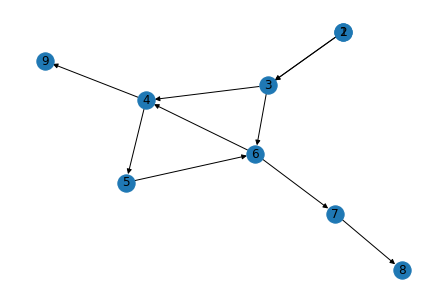

In [ ]:
graph2.tremauxTree.draw_original()

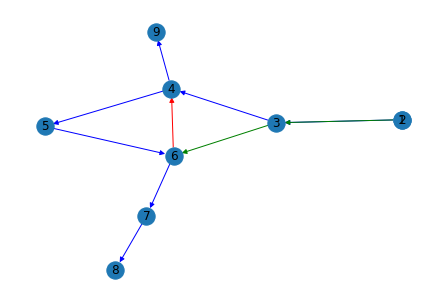

In [ ]:
graph2.tremauxTree.draw()

In [ ]:
graph2.order

[1, 3, 4, 5, 6, 7, 8, 9, 2]

In [ ]:
graph2.toGFA('../../1001G/pantograph/data/shorttest1.gfa',doSeq=False)

## Small graph with complex loops

In [ ]:
graph3 = GenomeGraph(gfaPath='./shorttest2.gfa',isGFASeq=False)

Loading graph from ./shorttest2.gfa
Loading segment 7/7
Loading segments finished.
Loading link 9/9
Loading links finished
Loading link 5/5
Loading paths finished. 5 paths added, 0 paths ignored.


In [ ]:
graph3.paths

[['2+', '4+', '7+', '1+'],
 ['2+', '3+', '5+', '6+', '2+'],
 ['1+', '2+', '4+', '7+'],
 ['4+', '7+', '1+', '2+', '3+', '5+'],
 ['5+', '6+', '2+', '4+', '7+']]

In [ ]:
graph3.treeSort()

Constructing Tremaux tree
Done!
Getting root nodes
Start Loop...
1 - 0 - 1 - 2 - 4
1 - 1 - 2 - 4 - 7
1 - 2 - 3 - 7 - 1
0 - 3 - 4 - 2 - 3
0 - 4 - 5 - 3 - 5
0 - 5 - 6 - 5 - 6


In [ ]:
pdb.pm()

> /usr/local/lib/python3.8/site-packages/numpy/core/fromnumeric.py(44)_wrapit()
     42     except AttributeError:
     43         wrap = None
---> 44     result = getattr(asarray(obj), method)(*args, **kwds)
     45     if wrap:
     46         if not isinstance(result, mu.ndarray):



ipdb>  u


> /usr/local/lib/python3.8/site-packages/numpy/core/fromnumeric.py(55)_wrapfunc()
     53     bound = getattr(obj, method, None)
     54     if bound is None:
---> 55         return _wrapit(obj, method, *args, **kwds)
     56 
     57     try:



ipdb>  u


> /usr/local/lib/python3.8/site-packages/numpy/core/fromnumeric.py(1193)argmax()
   1191 
   1192     """
-> 1193     return _wrapfunc(a, 'argmax', axis=axis, out=out)
   1194 
   1195 



ipdb>  u


> <__array_function__ internals>(5)argmax()



ipdb>  u


> /data/YandexDisk/Kew/src/graphConstruction/pangraph_constructor/tree.py(110)_preprocessPathTree()
    108                 edgePaths = [self.parentGraph.edgePaths.get(edge,0) for edge in graphInEdgeList]
    109                 # Find the edge with maximum number of paths passing
--> 110                 edgeToKeep = graphInEdgeList[np.argmax(edgePaths)]
    111 #                 print(f'Edge to keep: {edgeToKeep}')
    112                 # If the best edge not in the tree already



ipdb>  edgePaths


[]


ipdb>  graphInEdgeList


[]


ipdb>  l94


*** NameError: name 'l94' is not defined


ipdb>  l 94


     89 
     90         return treeCombined
     91 
     92     def _preprocessPathTree(self,treeCombined):
     93 #         pdb.set_trace()
     94         for node in self.originalGraph.nodes:
     95 
     96             # get all edges coming to given node in the full graph
     97             graphInEdgeList = list(self.originalGraph.in_edges(node))
     98             # get all edges coming to a given node in the tremaux tree
     99             treeInEdgeList = list(treeCombined.in_edges(node))



ipdb>  node


2


ipdb>  self.originalGraph.in_edges


InEdgeView([(7, 1), (1, 2), (6, 2), (2, 3), (2, 4), (3, 5), (4, 6), (5, 6), (4, 7)])


ipdb>  self.originalGraph.in_edges(2)


InEdgeDataView([(1, 2), (6, 2)])


ipdb>  treeInEdgeList


[]


ipdb>  l 100


     95 
     96             # get all edges coming to given node in the full graph
     97             graphInEdgeList = list(self.originalGraph.in_edges(node))
     98             # get all edges coming to a given node in the tremaux tree
     99             treeInEdgeList = list(treeCombined.in_edges(node))
    100 #             print(f'Node: {node}')
    101 #             print(f'Graph edges: {graphInEdgeList}')
    102 #             print(f'Tree edges: {treeInEdgeList}')
    103             if len(graphInEdgeList)>0:# and len(treeInEdgeList)>0:
    104                 # Remove self-cycle paths larger cycles will be removed later.
    105                 graphInEdgeList = [edge for edge in graphInEdgeList if (not nx.has_path(treeCombined,edge[1],edge[0]) or (edge[::-1]) in treeCombined.edges) and edge[0]!=edge[1]] # removed 'not nx.has_path(treeCombined,edge[1],edge[0]) and '



ipdb>  nx.has_path(treeCombined,2,1)


True


ipdb>  nx.has_path(treeCombined,6,2)


False


ipdb>  nx.has_path(treeCombined,2,6)


True


ipdb>  (2,1) in treeCombined.edges


False


ipdb>  (2,6) in treeCombined.edges


False


ipdb>  q


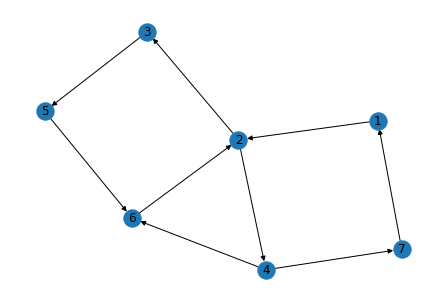

In [ ]:
graph3.tremauxTree.draw_original()

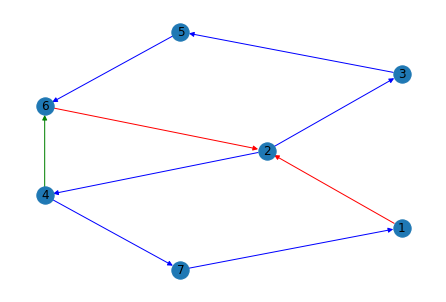

In [ ]:
graph3.tremauxTree.draw()

In [ ]:
len(graph3.order),len(graph3.nodes)

(7, 7)

In [ ]:
graph3.toGFA('../../1001G/pantograph/data/shorttest2.gfa',doSeq=False)

## Small graph with very complex relationships

In [ ]:
graph4 = GenomeGraph(gfaPath='./shorttest3.gfa',isGFASeq=False)

In [ ]:
graph4.paths

[['1+', '2+', '7+', '3+', '4+', '5+', '6+'],
 ['1+', '7+', '2+', '3+', '4+', '5+', '6+'],
 ['1+', '2+', '3+', '7+', '4+', '5+', '6+'],
 ['1+', '3+', '2+', '7+', '4+', '5+', '6+'],
 ['1+', '4+', '5+', '6+', '7+', '3+', '2+'],
 ['1+', '2+', '3+', '4+', '5+', '7+', '6+']]

In [ ]:
graph4.treeSort()

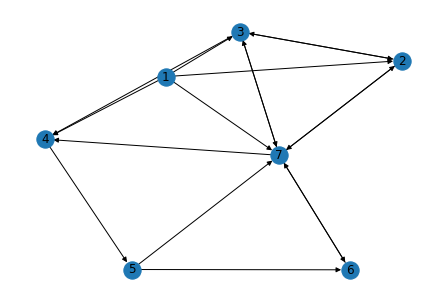

In [ ]:
graph4.tremauxTree.draw_original()

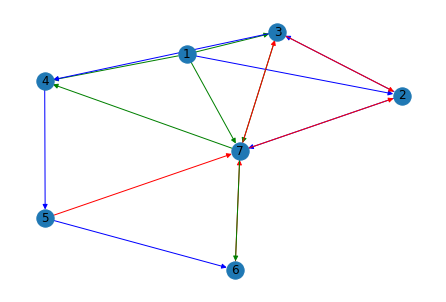

In [ ]:
graph4.tremauxTree.draw()

In [ ]:
graph4.order

[1, 2, 3, 4, 5, 6, 7]

In [ ]:
graph4.toGFA('../../1001G/pantograph/data/shorttest3.gfa',doSeq=False)

## Small graph with self-loops

In [ ]:
graph5 = GenomeGraph(gfaPath='./shorttest_loop.gfa',isGFASeq=False)

In [ ]:
graph5.paths

[['1+', '3+', '4+', '4+', '5+', '6+', '7+', '8+'],
 ['2+', '3-', '4-', '6+', '4+', '5+', '9+']]

In [ ]:
graph5.treeSort()

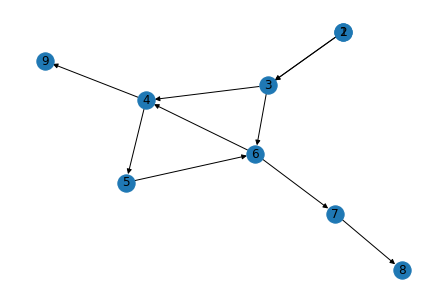

In [ ]:
graph5.tremauxTree.draw_original()

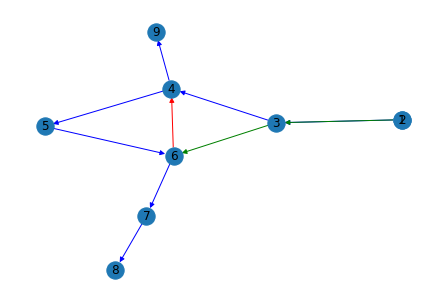

In [ ]:
graph5.tremauxTree.draw()

In [ ]:
graph5.order

[1, 3, 4, 5, 6, 7, 8, 9, 2]

In [ ]:
graph5.toGFA('../../1001G/pantograph/data/shorttest4.gfa',doSeq=False)

## Testing for exporting to Front-end

In [ ]:
from pangraph_constructor.utils import adjustZoomLevels,pathConvert
from pangraph_constructor.export import exportToPantograph

In [ ]:
pathfileDir = '../../1001G/coreGraph'
coreGFApath = f'{pathfileDir}{os.path.sep}coregraph_v3.gfa'
# coreGFApath = f'{pathfileDir}{os.path.sep}coreGraph.gfa'

In [ ]:
# zoomLevels = [1,10,20,100,500,1000,5000,10000,50000,100000,500000,1000000]
# zoomLevels = [1,3,9,45,90,450,900,4500,9000]
# zoomLevels = [1,3,9,18]
zoomLevels = [4,8,16,32]
maxLengthComponent = 100
maxLengthChunk = 6
invertionThreshold = 0.5
# inputPath = '../../1001G/pantograph/data/shorttest2.gfa'
# inputPath = '../../1001G/pantograph/data/AT_Chr1_OGOnly.gfa'
# inputPath = '../../1001G/chrisGraph/chr1.wfmash.n20.a90.s10000.p1,19,39,3,81,1.seqwish.sort.smooth.sort.gfa'
# inputPath = '../../1001G/pantograph/data/shorttest_seq.gfa'
inputPath = coreGFApath


In [ ]:
zoomLevels = adjustZoomLevels(zoomLevels)
outputPath,outputName = pathConvert(inputPath,suffix='_new')
outputPath,outputName,zoomLevels

('../../1001G/coreGraph', 'coregraph_v3_new', [1, 4, 8, 16, 32])

In [ ]:
from joblib import load

In [ ]:
q = load('../pantograph_API/data/caseToDBID.dict')

In [ ]:
q

{'coreGraph_v3_new': 0, 'coregraph_v3_new': 1}

In [ ]:
dbid = getDBID('../pantograph_API/data/caseToDBID.dict',outputName)
print(f'Opening Redis connection for db {dbid}')
redisConn = Redis(host='redis',port = 6379,db=dbid)

Opening Redis connection for db 1


In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_init.ipynb.
Converted 01_graph.ipynb.
Converted 02_tree.ipynb.
Converted 03_synteny.ipynb.
Converted 04_utils.ipynb.
Converted 05_export.ipynb.
Converted deBruijnGraphProcessing.ipynb.
Converted index.ipynb.


In [ ]:
# zoomComponentLengths,zoomNodeToComponent,zoomComponentToNodes,zoomComponents,zoomCompNucleotides,toLinks,fromLinks,graph = \
exportToPantograph(inputPath=inputPath,
                   outputName=outputName,
                   outputPath=outputPath,
                   isSeq=False,
                   redisConn=redisConn,
                   GenomeGraphParams={'accessionsToRemove':['Consensus']},
                   zoomLevels=zoomLevels,
                   maxLengthChunk=maxLengthChunk,
                   maxLengthComponent=maxLengthComponent,
                   invertionThreshold=invertionThreshold,)
#                    debug=True,returnDebugData=True)

Loading Genome
Loading graph from ../../1001G/coreGraph/coregraph_v3.gfa
Found node annotation file ../../1001G/coreGraph/annotation_coregraph_v3.dat, loading associations.
Loading segment 38/38
Loading segments finished.
Loading link 91/91
Loading links finished
Loading path 27/27
Loading paths finished. 27 paths added, 0 paths ignored.
Calculating nodes length...
Processing node 38/38
Finished calculating nodes lengths
Preprocessing paths...
Processing path 27/27
Finished preprocessing paths
Recording Pantograph data to ../../1001G/coreGraph/coregraph_v3_new
Calculating nodes length...
Processing node 38/38
Finished calculating nodes lengths
Preprocessing paths...
Processing path 27/27
Finished preprocessing paths

Zoom level 1
Processing node 38/38
Nodes processed, recording component to files.
Processing component 38/38
Recording finished. Zoom level time is 60.276282787323. Time elapsed 60.29482054710388

Zoom level 4
Processing node 38/38
Nodes processed, recording component to f

### Comments

Each node processing time increase significantly with overall number of nodes. This is wrong and should be investigated.

# Adding nucleotide data

In [ ]:
from copy import deepcopy
import numpy as np

In [ ]:
coregraph = GenomeGraph(gfaPath=coreGFApath,isGFASeq=False)
coregraph_genes = deepcopy(coregraph)

Loading graph from ../../1001G/coreGraph/coreGraph_v3.gfa
Found node annotation file ../../1001G/coreGraph/annotation_coreGraph_v3.dat, loading associations.
Loading segment 38/38
Loading segments finished.
Loading link 91/91
Loading links finished
Loading path 27/27
Loading paths finished. 27 paths added, 0 paths ignored.
Calculating nodes length...
Processing node 38/38
Finished calculating nodes lengths
Preprocessing paths...
Processing path 27/27
Finished preprocessing paths


In [ ]:
fullGraphPath = '../../1001G/pantograph/data/AT_Chr1_OGOnly_new.gfa'
fullgraph = GenomeGraph(gfaPath=fullGraphPath,isGFASeq=False)

Loading graph from ../../1001G/pantograph/data/AT_Chr1_OGOnly_new.gfa
Loading segment 8087/8087
Loading segments finished.
Loading link 15983/15983
Loading links finished
Loading path 27/27
Loading paths finished. 27 paths added, 0 paths ignored.
Calculating nodes length...
Processing node 8087/8087
Finished calculating nodes lengths
Preprocessing paths...
Processing path 27/27
Finished preprocessing paths


In [ ]:
chainToGenesFile = 'chain2gene_v3.txt'
maxChainLength = len(coregraph.nodes[0])
chainToListDict = {}
with open(f'{pathfileDir}{os.path.sep}{chainToGenesFile}') as f:
    for line in f:
        chainName, geneList = line.split(':')
        geneList = geneList.lstrip().rstrip().split(',')
        chainToListDict[chainName.zfill(maxChainLength)] = geneList

In [ ]:
for nodeIdx,nodeName in enumerate(coregraph.nodes):
    geneList = chainToListDict.get(nodeName.zfill(maxChainLength), [f'ch{nodeName.zfill(7)}'])
    if geneList[0][:2]!='ch':
        geneList = [fullgraph.nodes[int(gene.rstrip('+'))-1] for gene in geneList]
    coregraph_genes.nodesData[nodeIdx] = ''.join(geneList)
    for accession, chainDict in coregraph.nodesAnnotation[nodeIdx].items():
        interval = chainDict[nodeName]
        geneCumLengths = np.hstack((0, np.cumsum([len(gene) for gene in geneList])))
        coregraph.nodesAnnotation[nodeIdx][accession].update({gene:interval for gene in geneList})
        coregraph_genes.nodesAnnotation[nodeIdx][accession].update({gene:[(geneCumLengths[i], geneCumLengths[i+1]-1)] for i,gene in enumerate(geneList)})
        coregraph_genes.nodesAnnotation[nodeIdx][accession].update({nodeName:[(geneCumLengths[0], geneCumLengths[-1]-1)]})

In [ ]:
pathfileDir

'../../1001G/coreGraph'

In [ ]:
coregraph.toGFA(f'{pathfileDir}{os.path.sep}coregraph_v3.gfa',doSeq=False)
coregraph_genes.toGFA(f'{pathfileDir}{os.path.sep}coregraph_genes_v3.gfa',doSeq=True)

In [ ]:
pathfileDir = '../../1001G/coreGraph'
coreGFApath = f'{pathfileDir}{os.path.sep}coregraph_genes_v3.gfa'
# coreGFApath = f'{pathfileDir}{os.path.sep}coreGraph.gfa'

In [ ]:
# zoomLevels = [1,10,20,100,500,1000,5000,10000,50000,100000,500000,1000000]
zoomLevels = [1,3,9,45,90,450,900,4500,9000]
# zoomLevels = [1,3,9,18]
# zoomLevels = [4,8,16]
maxLengthComponent = 100
maxLengthChunk = 16
invertionThreshold = 0.5
# inputPath = '../../1001G/pantograph/data/shorttest2.gfa'
# inputPath = '../../1001G/pantograph/data/AT_Chr1_OGOnly.gfa'
# inputPath = '../../1001G/chrisGraph/chr1.wfmash.n20.a90.s10000.p1,19,39,3,81,1.seqwish.sort.smooth.sort.gfa'
# inputPath = '../../1001G/pantograph/data/shorttest_seq.gfa'
inputPath = coreGFApath


In [ ]:
zoomLevels = adjustZoomLevels(zoomLevels)
outputPath,outputName = pathConvert(inputPath,suffix='_new')
outputPath,outputName,zoomLevels

('../../1001G/coreGraph',
 'coregraph_genes_v3_new',
 [1, 3, 9, 45, 90, 450, 900, 4500, 9000])

In [ ]:
notebook2script()

Converted 00_init.ipynb.
Converted 01_graph.ipynb.
Converted 02_tree.ipynb.
Converted 03_synteny.ipynb.
Converted 04_utils.ipynb.
Converted 05_export.ipynb.
Converted deBruijnGraphProcessing.ipynb.
Converted index.ipynb.


In [ ]:
dbid = getDBID('../pantograph_API/data/caseToDBID.dict',outputName)
print(f'Opening Redis connection for db {dbid}')
redisConn = Redis(host='redis',port = 6379,db=dbid)

Opening Redis connection for db 2


In [ ]:
# zoomComponentLengths,zoomNodeToComponent,zoomComponentToNodes,zoomComponents,zoomCompNucleotides = \
exportToPantograph(inputPath=inputPath,
                   outputName=outputName,
                   outputPath=outputPath,
                   isSeq=True,
                   redisConn=redisConn,
                   GenomeGraphParams={'accessionsToRemove':['Consensus']},
                   zoomLevels=zoomLevels,
                   maxLengthChunk=maxLengthChunk,
                   maxLengthComponent=maxLengthComponent,
                   invertionThreshold=invertionThreshold,)
#                                              debug=True,returnDebugData=True)

Loading Genome
Loading graph from ../../1001G/coreGraph/coregraph_genes_v3.gfa
Found nodeNames file ../../1001G/coreGraph/nodeNames_coregraph_genes_v3.json, loading names.
Found node annotation file ../../1001G/coreGraph/annotation_coregraph_genes_v3.dat, loading associations.
Loading segment 38/38
Loading segments finished.
Loading link 91/91
Loading links finished
Loading path 27/27
Loading paths finished. 27 paths added, 0 paths ignored.
Calculating nodes length...
Processing node 38/38
Finished calculating nodes lengths
Preprocessing paths...
Processing path 27/27
Finished preprocessing paths
Recording Pantograph data to ../../1001G/coreGraph/coregraph_genes_v3_new
Calculating nodes length...
Processing node 38/38
Finished calculating nodes lengths
Preprocessing paths...
Processing path 27/27
Finished preprocessing paths

Zoom level 1
Processing node 38/38
Nodes processed, recording component to files.
Processing component 370/370
Recording finished. Zoom level time is 1523.9219067

In [ ]:
!ntfy send "Pantograph data generation finished."